In [11]:
import pandas as pd
import geopandas as gpd

In [12]:
dist = 'jinko_suikei_2018'

In [13]:
def get_data(n):
    # zipファイルのURLからデータ読み込み
    url = f'https://nlftp.mlit.go.jp/ksj/gml/data/m1kh30/m1kh30-18/1km_mesh_suikei_2018_shape_{n:02}.zip'
    df = (gpd.read_file(url)
          .filter(regex='^PT[0A-E]|geometry|MESH_ID')
          .set_index('MESH_ID'))

    with open(f"{dist}/mesh{n:02}.json", "w") as f:
        f.write(df.filter(items=["geometry"]).to_json())
    pd.DataFrame(df.filter(regex='^PT[0A-E]')).to_json(f"{dist}/df{n:02}.json", orient="split")
    
    df["pref"] = n
    return df

In [15]:
dfs = list()
for i in range(1, 48):
    print(i)
    dfs.append(get_data(i))

In [16]:
all = pd.concat(dfs)

with open(f"{dist}/mesh00.json", "w") as f:
    f.write(all.filter(items=["geometry"]).to_json())
pd.DataFrame(all.filter(regex='^PT[0A-E]|pref')).to_json(f"{dist}/df00.json", orient="split")

# sample

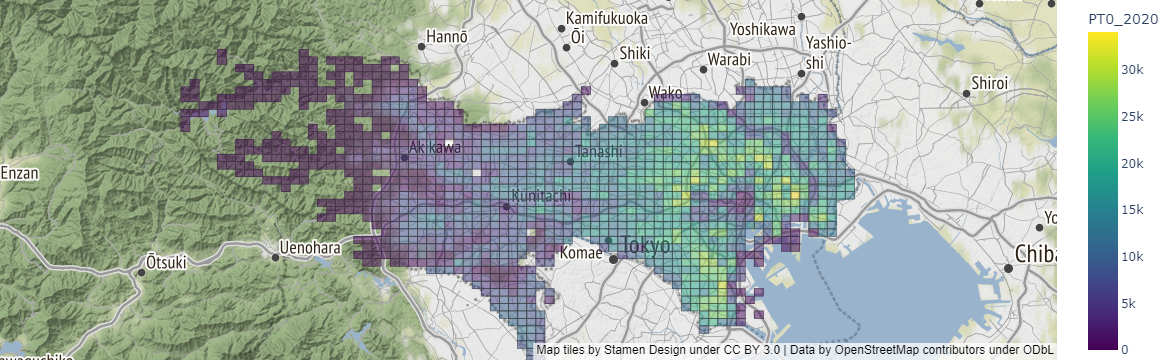

In [19]:
import json
import plotly
import plotly.express as px
def myplot(df, geo):
    
    fig = px.choropleth_mapbox(
        df, 
        geojson=geo, 
        locations=df.index, 
        color='PT0_2020',
        color_continuous_scale="Viridis",
        mapbox_style="stamen-terrain",
        zoom=9, center = { "lon": 139.464890, "lat": 35.704516 },
        opacity=0.5,
        labels={'unemp':'unemployment rate'}
    )
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    fig.show()
    
    
def plot_by_plotly(n):
    df = pd.read_json(f"{dist}/df{n:02}.json", orient="split", convert_axes =False)
    
    with open(f"{dist}/mesh{n:02}.json") as j:
        geo = json.load(j)
    
    myplot(df, geo)


plot_by_plotly(13)